In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import category_encoders as ce
from sklearn.model_selection import KFold


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("car_evaluation.csv")
df.iloc[0]

vhigh      vhigh
vhigh.1    vhigh
2              2
2.1            2
small      small
low          med
unacc      unacc
Name: 0, dtype: object

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df['buying'].unique()[0]

'vhigh'

In [4]:
for series in df.columns:
    print(df[series].unique())
    

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


<Axes: xlabel='class', ylabel='count'>

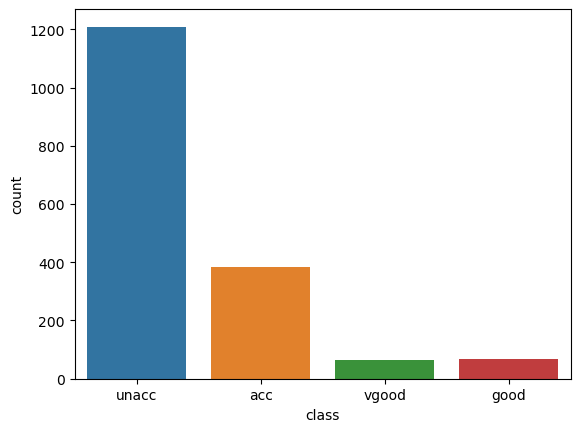

In [5]:
sns.countplot(data=df,x="class")

In [6]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [7]:
x = df.drop(["class"],axis=1)
y = df["class"]

In [8]:
from my_tree import Tree
myTree = Tree(x,y)

In [9]:
# myTree.fit(x,y)

In [10]:
from sklearn.model_selection import train_test_split 
#x = encoder.fit_transform(x)



'tree.pdf'

 accuracy: 0.6947368421052632


In [12]:
X_tv,X_test,y_tv,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

train_acc = []
valid_acc = []
test_acc = []
for train_idx, test_idx in kf.split(X_tv):
    X_train, X_valid = X_tv.iloc[train_idx], X_tv.iloc[test_idx]
    y_train, y_valid = y_tv.iloc[train_idx], y_tv.iloc[test_idx]


    myTree = Tree(X_train, y_train)
    myTree.fit(X_train, y_train)

    
    tree_graph = myTree.visualize_tree(myTree.root)
    tree_graph.render(f"tree_{fold}", view=False)

    y_predict_train = myTree.predict(X_train)
    y_predict_valid = myTree.predict(X_valid)
    y_predict_test = myTree.predict(X_test)

    count = 0
    for i in range(len(y_predict_train)):
        if y_predict_train[i] == y_train.iloc[i]:
            count+=1
    train_acc.append(count/len(y_predict_train))
    count = 0
    for i in range(len(y_predict_valid)):
        if y_predict_valid[i] == y_valid.iloc[i]:
            count+=1
    valid_acc.append(count/len(y_predict_valid))
    print(f"Fold {fold} - validation accuracy {count/len(y_predict_valid)}") 
    count = 0
    for i in range(len(y_predict_test)):
        if y_predict_test[i] == y_test.iloc[i]:
            count+=1
    test_acc.append(count/len(y_predict_test))
    
    
    fold += 1



Fold 1 - validation accuracy 0.7617328519855595
Fold 2 - validation accuracy 0.7065217391304348
Fold 3 - validation accuracy 0.6992753623188406
Fold 4 - validation accuracy 0.7355072463768116
Fold 5 - validation accuracy 0.6920289855072463


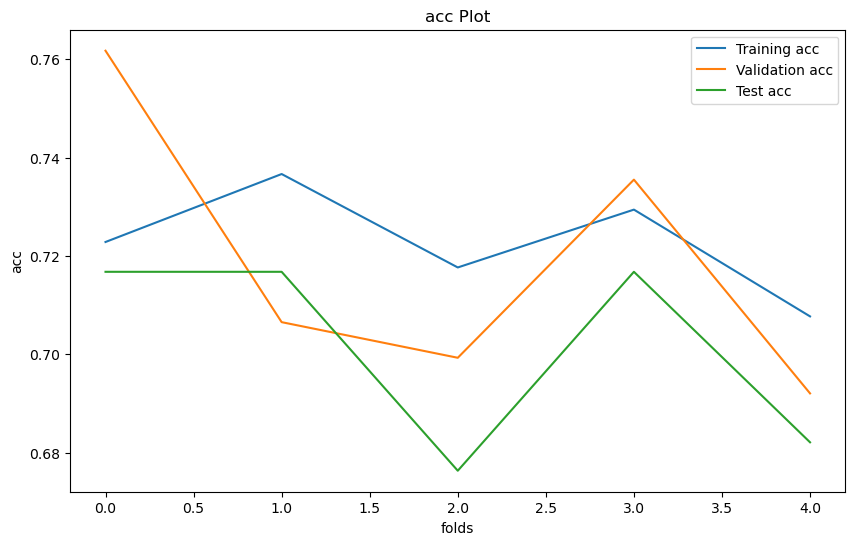

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training acc')
plt.plot(valid_acc, label='Validation acc')
plt.plot(test_acc, label='Test acc')
plt.xlabel('folds')
plt.ylabel('acc')
plt.title('acc Plot')
plt.legend()
plt.show()